# Fault Diagnosis Toolbox in Python -- a development notebook

Erik Frisk<br>
<frisk@isy.liu.se><br>
Department of Electrical Engineering<br>
Linköping University<br>
Sweden

In [1]:
%matplotlib notebook
new_paths = ['Models/', 'Misc/', 'faultdiagnosistoolbox/build/lib.macosx-10.6-x86_64-2.7/']

import matplotlib
import matplotlib.pyplot as plt
import sys
import numpy as np
import scipy.sparse as sp
[sys.path.append(d) for d in new_paths if not d in sys.path];
from misc import *
import faultdiagnosistoolbox as fdt
import structuralanalysis as sa
import faultdiagnosistoolbox.dmperm as dmperm

## Some basic helper functions

In [ ]:
def ReadMatrixCSV(fileName):
    with open(fileName, 'rt') as csvfile:
        matReader = csv.reader(csvfile, delimiter=' ', quotechar='|')
        size = matReader.next() # Assume first line contains size information
        X=np.zeros((int(size[0]),int(size[1])),dtype='float64');
        for edge in matReader:
            X[int(edge[0]),int(edge[1])] = float(edge[2])
        return sp.csc_matrix(X.astype(np.int64))
def BoxOff(*argin):
    if len(argin)>0:
        ax=argin[0]
    else:
        ax=plt.gca();
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

## Low level function calls

In [2]:
X=ReadMatrixCSV('Xengine.txt')
p,q,r,s,_,_=sa.dmperm_internal(dmperm.CSCDict(X))
print p

[ 83  85  88  87 131 120 121 123 122 124 132 138 133 139 140 134 135  82
  84  86 136 137   0   1  11   2   3   4   5   6   7   8   9  10  12  13
  14  17  15  16  18  19  20  23  21  22  24  66  29  25  34  30  26  27
  28  31  45  32  33  37  38  35  36  39  57  40  41  42  43  44  51  46
  50  48  49  47  53  52  54  56  55  58  59  60  67  68  61  65  62  63
  64  69  70  72  71  73  74  79  75  76  77  78  80  81  89  90  93  91
  92  94  97 101  95  98  96 100  99 102 103 105 113 104 106 110 111 109
 107 108 112 114 115 118 116 119 235 125 128 126 129 130 141 145 143 142
 144 149 171 146 148 160 147 150 152 151 155 154 153 156 159 158 157 164
 165 166 161 162 163 167 168 210 169 170 172 173 174 175 198 176 192 177
 204 178 184 181 179 180 182 183 185 186 187 189 190 188 191 194 195 193
 196 197 201 203 200 199 202 206 205 207 208 209 211 212 213 214 215 216
 218 217 224 223 220 219 221 244 222 226 225 227 228 229 233 230 231 232
 234 236 238 239 237 240 249 241 242 243 245 246 27

<IPython.core.display.Javascript object>


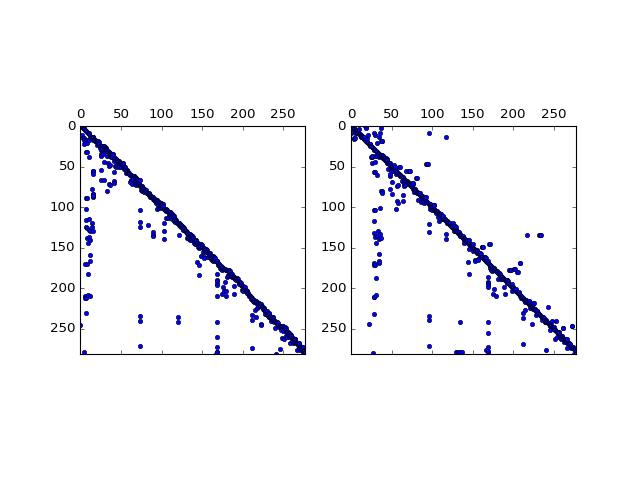

In [3]:
plt.figure(10)
plt.subplot(1,2,1)
plt.spy(X, marker="o", markersize=4);
plt.subplot(1,2,2)
plt.spy(X[p,:][:,q], marker="o", markersize=4);
plt.show()

<IPython.core.display.Javascript object>


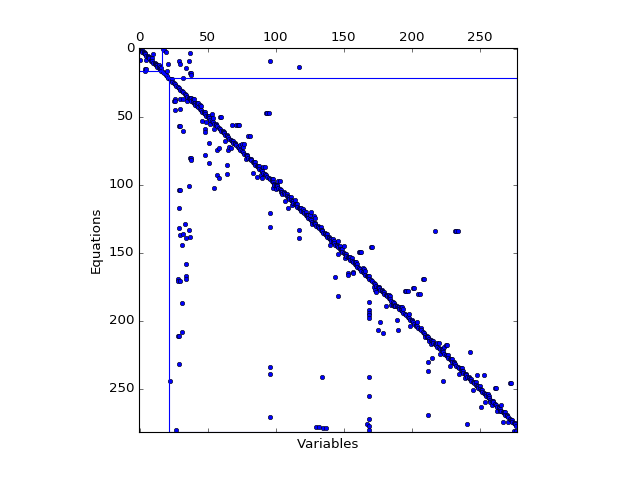

In [4]:
plt.figure(11)
fdt.PlotDM(X,verbose=False,eqclass=False)
plt.show()

## Try some basic dmperm functionality  and time performance

In [5]:
reload(dmperm);

In [6]:
row=dmperm.Mplus(X);
print row

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 125 126 127 128 129 130 141 142 143 144 145 146 147
 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183
 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255
 256 257 258 259 260 261 262 263 264 265 266 267 26

In [7]:
dm=dmperm.GetDMParts(X)
dmperm.sprank(X)

278

Evaluate timing performance by doing 1000 dmperm 

Matlab comparisson (my iMac):<br>
tic; for k=1:1000; GetDMParts(X); end; toc<br>
Elapsed time is 0.108608 seconds.


In [8]:
import timeit
timeit.timeit('dmperm.GetDMParts(X)', setup="from __main__ import dmperm, X",number=1000)

0.10459303855895996

In [9]:
print dmperm.IsPSO(X)
print dmperm.IsPSO(X[dm.Mp.row,:][:,dm.Mp.col])

False
True


In [12]:
Xp=X[dm.Mp.row,:][:,dm.Mp.col]
pd=dmperm.PSODecomposition(Xp)
print len(pd['eqclass'])
print len(pd['X0'])

12
16


## Try some MSO calculations

In [13]:
msos=sa.findmso_internal(dmperm.CSCDict(X));
print len(msos)
print len(msos[0])
print msos[0]

598
48
[172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 169 170 171  12   8   7   5   4 278]


In [14]:
import timeit
timeit.timeit('sa.findmso_internal(dmperm.CSCDict(X))', setup="from __main__ import sa, dmperm, X",number=100)

4.480515003204346

<IPython.core.display.Javascript object>


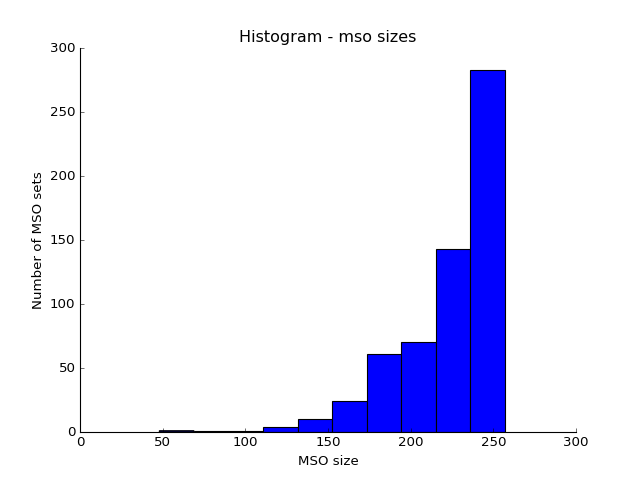

In [15]:
mso_n = map(lambda m:len(m), msos)
plt.figure(20)
plt.hist(mso_n,bins=10,normed=False)
plt.title('Histogram - mso sizes')
plt.xlabel('MSO size')
plt.ylabel('Number of MSO sets')
BoxOff()
plt.show()